<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')


In [ ]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,162999.000000,163003.000000,163003.000000,163003.000000,162637.000000,1.630030e+05,1.629990e+05
mean,98170.717422,2020.258449,63.382183,1198.344632,29.226861,2.153918e+08,5.297368e+10
std,2467.998984,3.005057,94.323062,8825.505678,14.841717,7.874180e+07,1.612977e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.762441e+08,5.303301e+10
50%,98122.000000,2021.000000,13.000000,0.000000,33.000000,2.209718e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,42.000000,2.495753e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


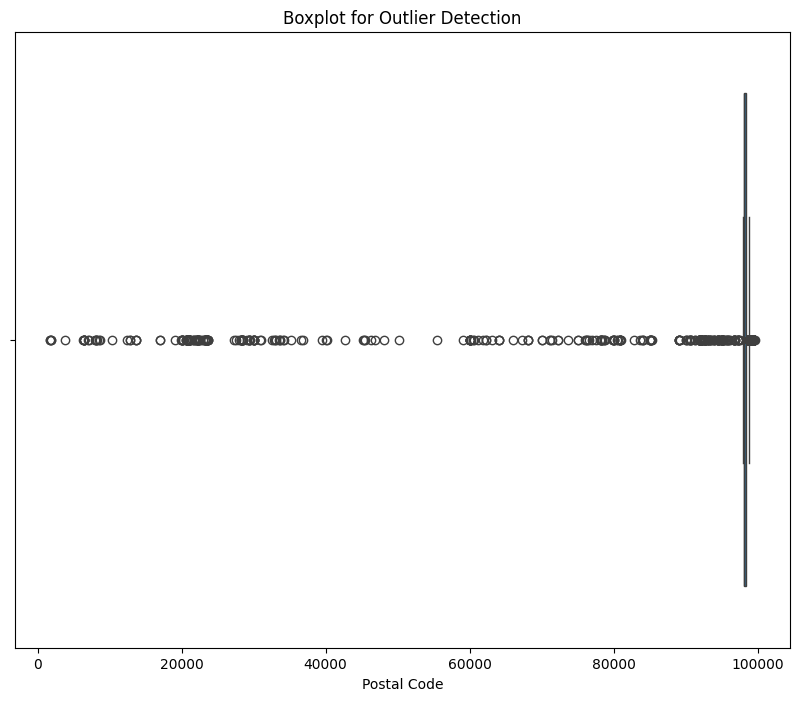

In [ ]:
column_name = 'Postal Code'
# Create a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x=data[column_name])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:

from scipy.stats import zscore


# Extract a numerical column for Z-score calculation and outlier detection
column_name = 'Postal Code'  # Replace with the name of your numerical column

# Calculate Z-scores
z_scores = zscore(data[column_name])

# Define a threshold for outlier detection (adjust as needed)
threshold = 3

# Identify outliers based on Z-scores
outliers = np.abs(z_scores) > threshold

# Print the indices of detected outliers
outlier_indices = np.where(outliers)[0]
print("Indices of detected outliers:", outlier_indices)

# Print the values of detected outliers
print("Values of detected outliers:", data[column_name][outlier_indices])


Indices of detected outliers: []
Values of detected outliers: Series([], Name: Postal Code, dtype: float64)


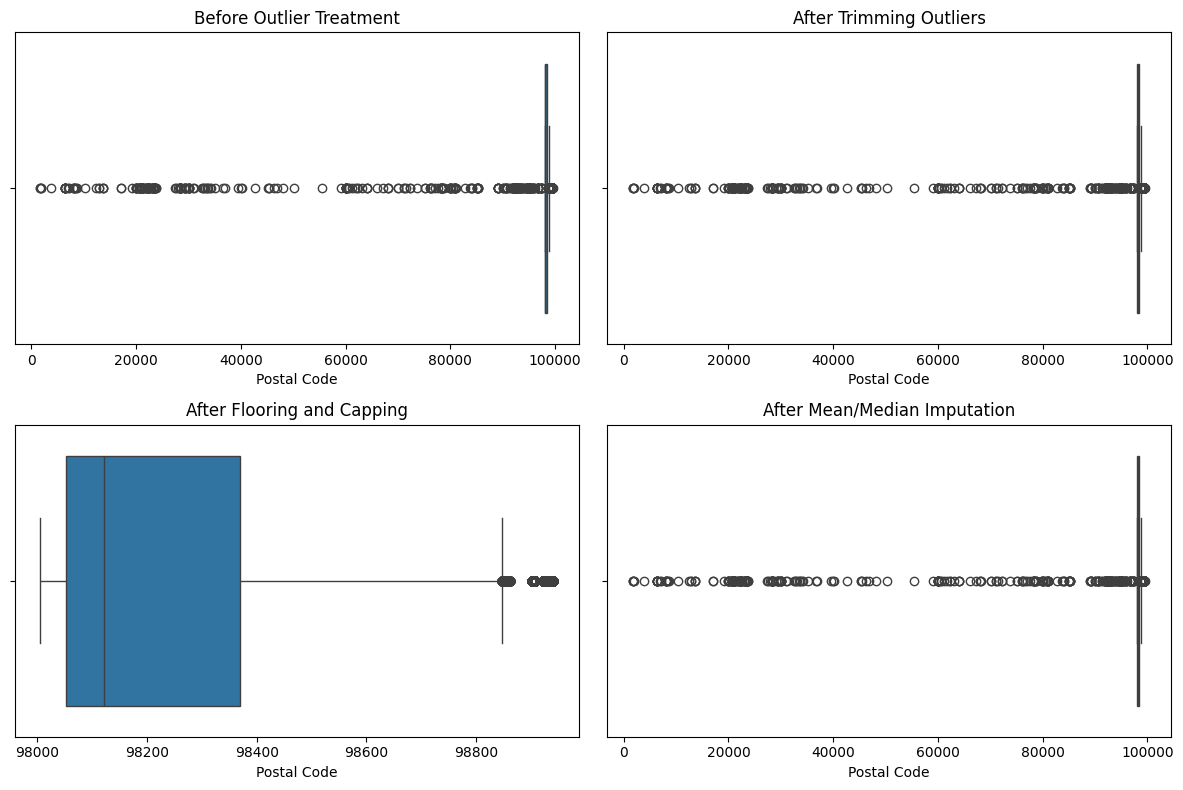

In [ ]:
# Step 1: Trimming/Remove outliers
# Calculate Z-scores
z_scores = zscore(data[column_name])

# Define a threshold for outlier detection (any Z-score outside of 3rd standard deviation)
z_threshold = 3

# Identify outliers based on Z-scores
outliers = np.abs(z_scores) > z_threshold

# Remove outliers
data_trimmed = data[~outliers]

# Step 2: Quantile-Based Flooring and Capping
# Set a range for quantile-based flooring and capping (adjust as needed)
floor_quantile = 0.05
cap_quantile = 0.95

floor_value = data[column_name].quantile(floor_quantile)
cap_value = data[column_name].quantile(cap_quantile)

# Flooring and capping
data_floor_cap = data.copy()
data_floor_cap[column_name] = np.clip(data_floor_cap[column_name], floor_value, cap_value)

# Step 3: Mean/Median Imputation
# Impute missing values (if any) with mean or median
imputation_value = data[column_name].median()  # Change to mean() if you prefer mean imputation
data_imputed = data.copy()
data_imputed[column_name] = data_imputed[column_name].fillna(imputation_value)

# Visualizing the Data before and after treating outliers
plt.figure(figsize=(12, 8))

# Before treatment
plt.subplot(2, 2, 1)
sns.boxplot(x=data[column_name])
plt.title('Before Outlier Treatment')

# After trimming
plt.subplot(2, 2, 2)
sns.boxplot(x=data_trimmed[column_name])
plt.title('After Trimming Outliers')

# After quantile-based flooring and capping
plt.subplot(2, 2, 3)
sns.boxplot(x=data_floor_cap[column_name])
plt.title('After Flooring and Capping')

# After mean/median imputation
plt.subplot(2, 2, 4)
sns.boxplot(x=data_imputed[column_name])
plt.title('After Mean/Median Imputation')

plt.tight_layout()
plt.show()